# Comparação de Classificadores

Este *notebook* demonstra o uso dos teste não-paramétricos de Friedman e de Nemenyi para comparar modelos em muitas bases de dados. Baseado no artigo [***Statistical Comparisons of Classifiers
over Multiple Data Sets***](https://jmlr.org/papers/volume7/demsar06a/demsar06a.pdf) de Janez Demsar.

Para executá-los usa-se o *framework* [Autorank](https://sherbold.github.io/autorank/) que automatiza o processo de avaliação de métodos.

## Carregando Bibliotecas

O experimento utiliza, além de Autorank, Pandas e Scikit-Learn para execução.

In [ ]:
!pip install autorank

  Preparing metadata (setup.py) ... done
  Created wheel for baycomp: filename=baycomp-1.0.3-py3-none-any.whl size=18027 sha256=6a21d9bd8a90b20d8b98deb3bcfb552d6abbcfc2e20dc2def8875ff42e17b7b2
  Stored in directory: /root/.cache/pip/wheels/2b/a2/b8/9c0b9ffde746a4e0c20639b46eae34dda4e0588efebde8916e
Successfully built baycomp


In [ ]:
import pandas as pd


from autorank import autorank


from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection  import RandomizedSearchCV
from sklearn.pipeline import Pipeline

## Datasets

Foram escolhidos quatro *datasets* para a demonstração, todos estão presentes no biblioteca Scikit-Learn. Todos foram separados em conjuntos de treino e de teste nas proporções 75%-25%, respectivamente.

In [ ]:
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer

In [ ]:
iris = load_iris()
digits = load_digits()
wine = load_wine()
breast_cancer = load_breast_cancer()

In [ ]:
X_iris = iris.data
y_iris = iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, random_state=0)

X_digits = digits.data
y_digits = digits.target
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, random_state=0)

X_wine = wine.data
y_wine = wine.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, random_state=0)

X_breast_cancer = breast_cancer.data
y_breast_cancer = breast_cancer.target
X_train_breast_cancer, X_test_breast_cancer, y_train_breast_cancer, y_test_breast_cancer = train_test_split(X_breast_cancer, y_breast_cancer, random_state=0)

In [ ]:
X_data = {
          'iris':[X_train_iris, y_train_iris, X_test_iris, y_test_iris],

          'digits':[X_train_digits, y_train_digits, X_test_digits, y_test_digits],

          'wine':[X_train_wine, y_train_wine, X_test_wine, y_test_wine],

          'breast_cancer':[X_train_breast_cancer, y_train_breast_cancer, X_test_breast_cancer, y_test_breast_cancer]
          }

## Funçõe de Treino e de Teste

O experimento utiliza quatro modelos de aprendizagem de máquina: Multilayer Percetron (MLP), Support Vector Machine (SVM), Random Forest e Árvore de Decisão.

In [ ]:
def rf_function(x_train, y_train, x_test, y_test):



  RF_params = {
        'rf__n_estimators': [10,100,200],
             'rf__max_depth':[None, 2, 3, 4]
              }

  pipe = Pipeline([('scaler',MinMaxScaler()) ,('rf', RandomForestClassifier())])
  search = RandomizedSearchCV(pipe, RF_params, cv=3)
  search.fit(x_train, y_train)
  preds = search.predict(x_test)

  score = accuracy_score(y_test, preds)

  return search.best_estimator_, preds, search.best_params_, score

In [ ]:
def svm_function(x_train, y_train, x_test, y_test):


  SVM_params =  {
                'svm__C': [0.1, 00.1, 000.1],
                'svm__kernel': ['linear', 'rbf']
                }

  pipe = Pipeline([('scaler',MinMaxScaler()) ,('svm', SVC())])
  search = RandomizedSearchCV(pipe, SVM_params, cv=3)
  search.fit(x_train, y_train)
  preds = search.predict(x_test)

  score = accuracy_score(y_test, preds)

  return search.best_estimator_, preds, search.best_params_, score

In [ ]:
def mlp_function(x_train, y_train, x_test, y_test):


  MLP_params = {
              'mlp__hidden_layer_sizes': [(50,50,50)],
              'mlp__alpha': [0.0001, 0.05]
                }

  pipe = Pipeline([('scaler', MinMaxScaler()), ('mlp', MLPClassifier())])
  search = RandomizedSearchCV(pipe, MLP_params, cv=3)
  search.fit(x_train, y_train)
  preds = search.predict(x_test)

  score = accuracy_score(y_test, preds)

  return search.best_estimator_, preds, search.best_params_, score

In [ ]:
def dt_function(x_train, y_train, x_test, y_test):

  DT_params = {
              'dt__max_depth': [2, 3, 5, 10],
              'dt__min_samples_split': [2, 3, 5],
                }

  pipe = Pipeline([('scaler', MinMaxScaler()), ('dt', DecisionTreeClassifier())])
  search = RandomizedSearchCV(pipe, DT_params, cv=3)
  search.fit(x_train, y_train)
  preds = search.predict(x_test)

  score = accuracy_score(y_test, preds)

  return search.best_estimator_, preds, search.best_params_, score

In [ ]:
df_score = pd.DataFrame(columns=['dataset', 'rf','svm','mlp','dt'])

Os laços abaixo executam os experiemntos. O primeiro itera sobre a quantidade de experimentos por base de dados; o segundo, sobre as base de dados.

Cada linha representa um experimento.

In [ ]:
df_score

,dataset,rf,svm,mlp,dt


In [ ]:
for i in range(2):

  for key, value in X_data.items():

    print("\U0001F680", key.upper(), i)

    x = value[0]
    y = value[1]
    x_test = value[2]
    y_test = value[3]

    rf_model, rf_preds, rf_params, rf_score = rf_function(x, y, x_test, y_test)
    svm_model, svm_preds, svm_params, svm_score = svm_function(x, y, x_test, y_test)
    mlp_model, mlp_preds, mlp_params, mlp_score = mlp_function(x, y, x_test, y_test)
    dt_model, dt_preds, dt_params, dt_score = dt_function(x, y, x_test, y_test)

    new_row = {'dataset':key+'-'+str(i), 'rf':rf_score, 'svm':svm_score, 'mlp':mlp_score , 'dt':dt_score}
    df_score = pd.concat([df_score, pd.DataFrame([new_row])], ignore_index=True)

    print(key.upper(), str(i), "\U00002705" )
    print()
    print("#################")








🚀 IRIS 0


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

IRIS 0 ✅

#################
🚀 DIGITS 0


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


DIGITS 0 ✅

#################
🚀 WINE 0


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

WINE 0 ✅

#################
🚀 BREAST_CANCER 0


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

BREAST_CANCER 0 ✅

#################
🚀 IRIS 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

IRIS 1 ✅

#################
🚀 DIGITS 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


DIGITS 1 ✅

#################
🚀 WINE 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

WINE 1 ✅

#################
🚀 BREAST_CANCER 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer

BREAST_CANCER 1 ✅

#################


In [ ]:
df_score.iloc[:,1:].T.rank()

,0,1,2,3,4,5,6,7
rf,2.5,4.0,2.0,3.0,1.0,4.0,2.0,4.0
svm,2.5,2.0,3.5,3.0,3.0,2.5,3.0,2.0
mlp,2.5,3.0,3.5,3.0,3.0,2.5,4.0,3.0
dt,2.5,1.0,1.0,1.0,3.0,1.0,1.0,1.0


In [ ]:
from autorank import autorank, plot_stats, create_report, latex_table

In [ ]:
# P-valor < 0,05

result = autorank(df_score.iloc[:,1:], alpha=0.05, verbose=False, order='ascending')
print(result)

RankResult(rankdf=
     meanrank    median       mad  ci_lower  ci_upper effect_size   magnitude
dt     1.4375  0.880264  0.043761  0.826667  0.973684         0.0  negligible
svm    2.6875  0.973509  0.002222  0.951049  0.977778   -2.029884       large
rf     2.8125  0.963792  0.011318  0.947368  0.982222   -1.762697       large
mlp    3.0625  0.973684  0.004094  0.951049       1.0   -2.027473       large
pvalue=0.01773494775372826
cd=1.6582924452770451
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[np.float64(0.3084962822676801), np.float64(0.0019133096764778613), np.float64(0.08008133702996122), np.float64(0.17430636733151994)]
homoscedastic=False
pval_homogeneity=4.709712360762777e-07
homogeneity_test=levene
alpha=0.05
alpha_normality=0.0125
num_samples=8
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
effect_size=akinshin_gamma
force_mode=None)


In [ ]:
print(create_report(result))

The statistical analysis was conducted for 4 populations with 8 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the population svm (p=0.002). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and one of them is not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=1.658 of the Nemenyi test.
We reject the null hypothesis (p=0.018) of the Friedman test that there is no difference in the ce

<Axes: >

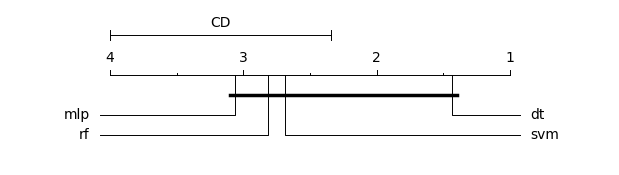

In [ ]:
plot_stats(result)